# Data Dimensionality
## Deaths

Nr. Records =  286
First Date 2015-01-05 00:00:00
Last Date 2020-09-07 00:00:00


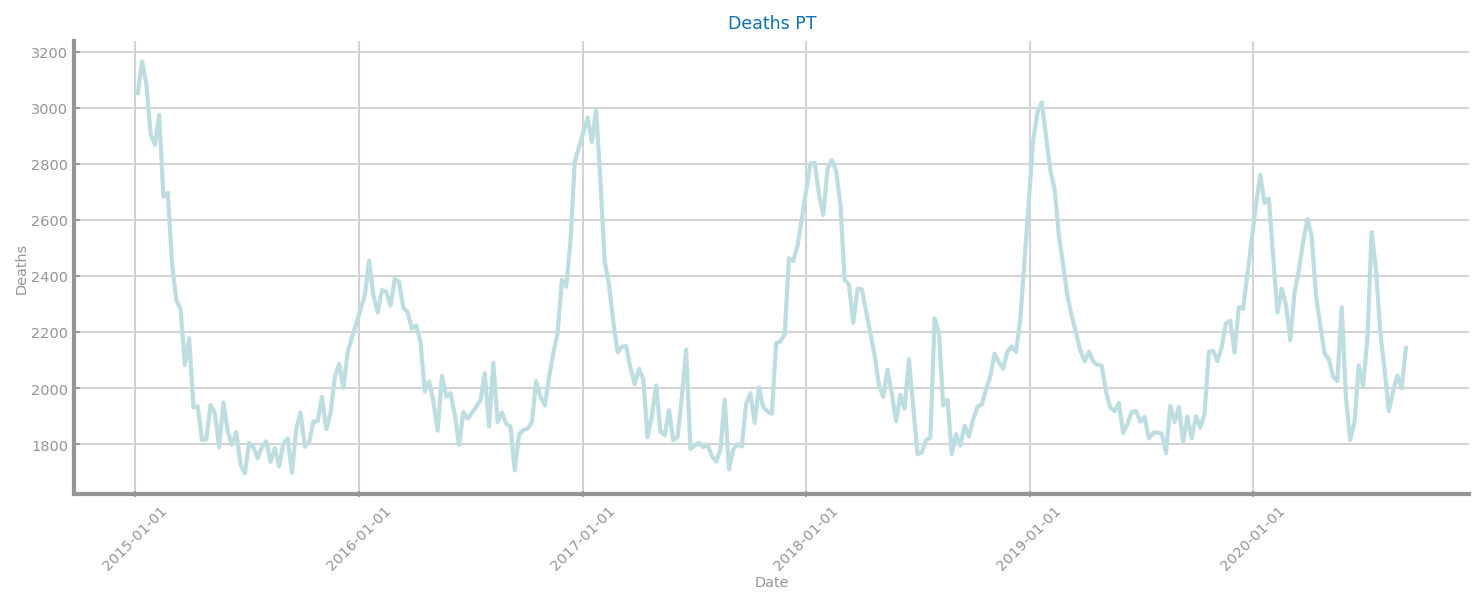

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

data_d = pd.read_csv('data/deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, dayfirst=True)
print("Nr. Records = ", data_d.shape[0])
print("First Date", data_d.index[0])
print("Last Date", data_d.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data_d, x_label='Date', y_label='Deaths', title='Deaths PT')
plt.xticks(rotation = 45)
plt.show()

## Covid

Nr. Records =  323
First Date 2020-01-22 00:00:00
Last Date 2020-12-09 00:00:00


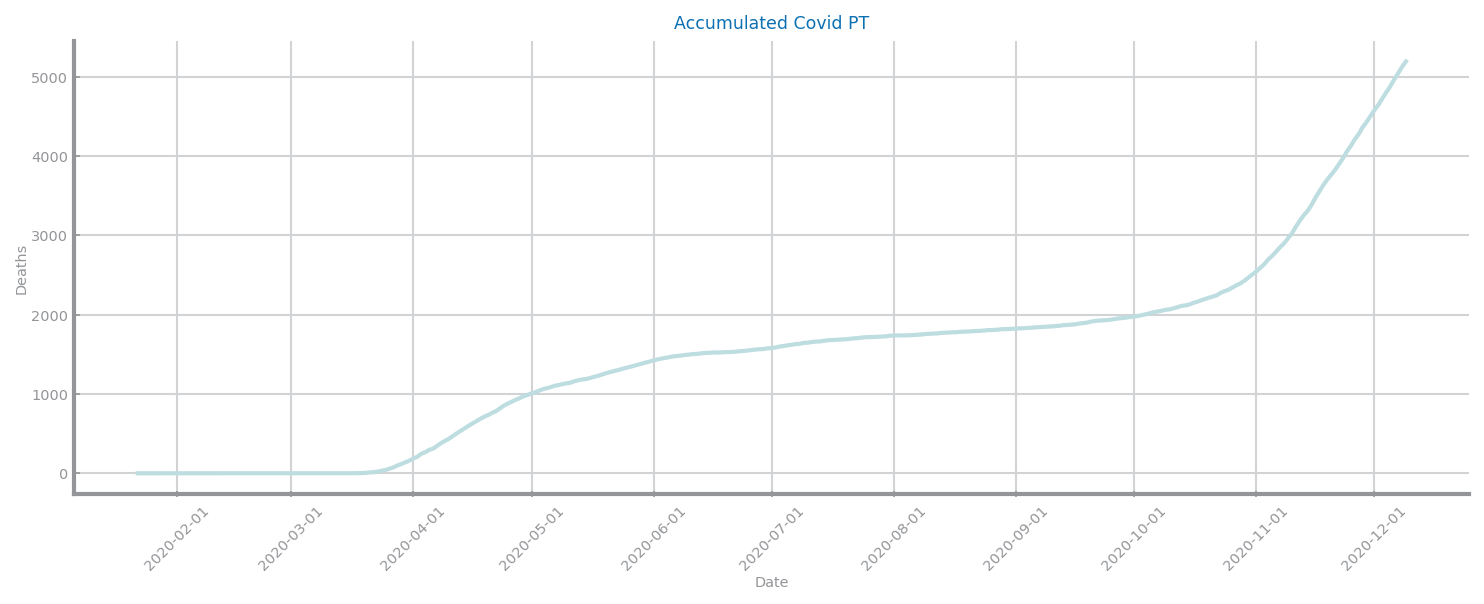

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

data_c = pd.read_csv('data/covid19_pt.csv', index_col='Date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)
print("Nr. Records = ", data_c.shape[0])
print("First Date", data_c.index[0])
print("Last Date", data_c.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data_c, x_label='Date', y_label='Deaths', title='Accumulated Covid PT')
plt.xticks(rotation = 45)
plt.show()

Nr. Records =  323
First Date 2020-01-22 00:00:00
Last Date 2020-12-09 00:00:00


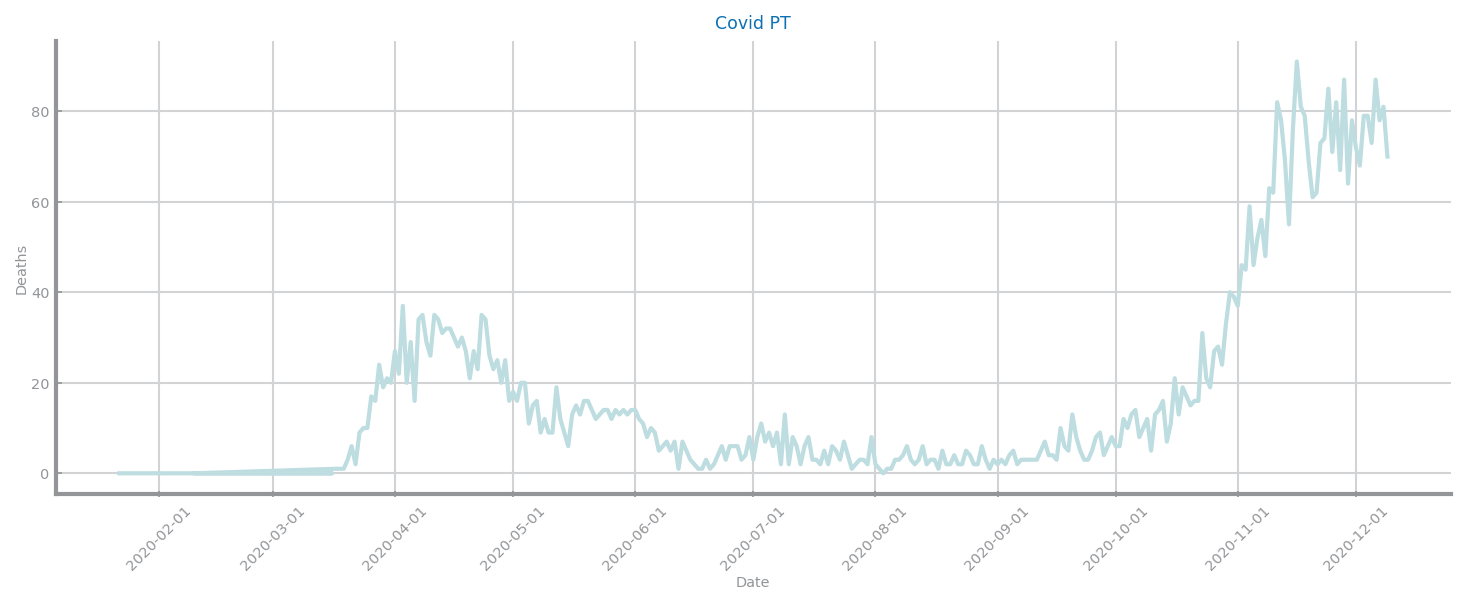

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

data_c2 = pd.read_csv('data/covid19_pt_2.csv', index_col='Date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)
print("Nr. Records = ", data_c2.shape[0])
print("First Date", data_c2.index[0])
print("Last Date", data_c2.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data_c2, x_label='Date', y_label='Deaths', title='Covid PT')
plt.xticks(rotation = 45)
plt.show()

# Data Granularity
## Deaths

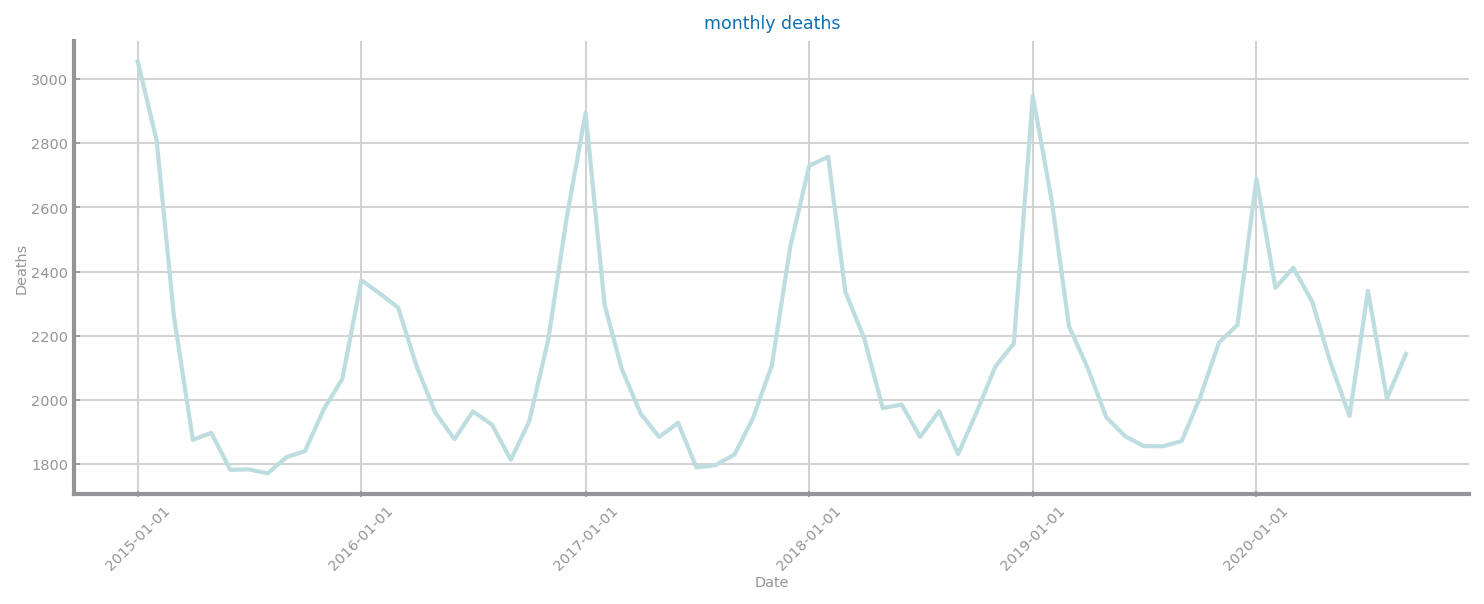

In [34]:
index = data_d.index.to_period('M')
d_month_df = data_d.copy().groupby(index).mean()
d_month_df['start_date'] = index.drop_duplicates().to_timestamp()
d_month_df.set_index('start_date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(d_month_df, title='monthly deaths', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

## Covid

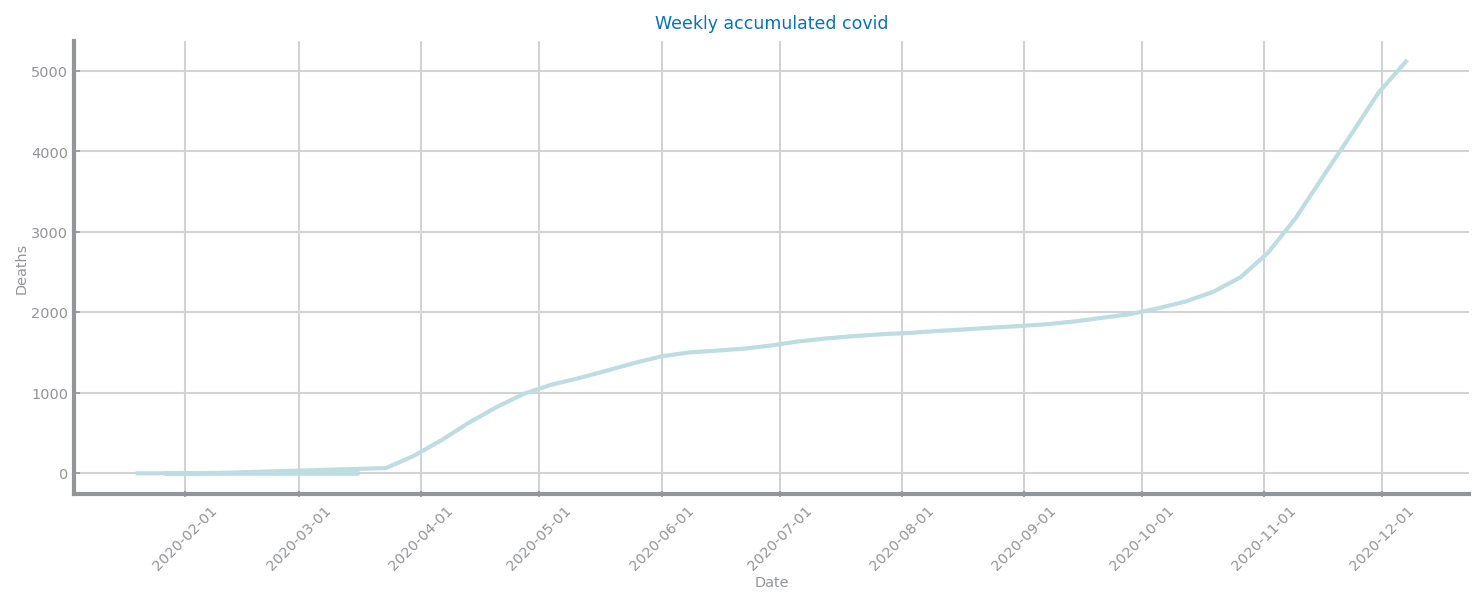

In [5]:
index = data_c.index.to_period('W')
c_week_df = data_c.copy().groupby(index).mean()
c_week_df['Date'] = index.drop_duplicates().to_timestamp()
c_week_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(c_week_df, title='Weekly accumulated covid', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

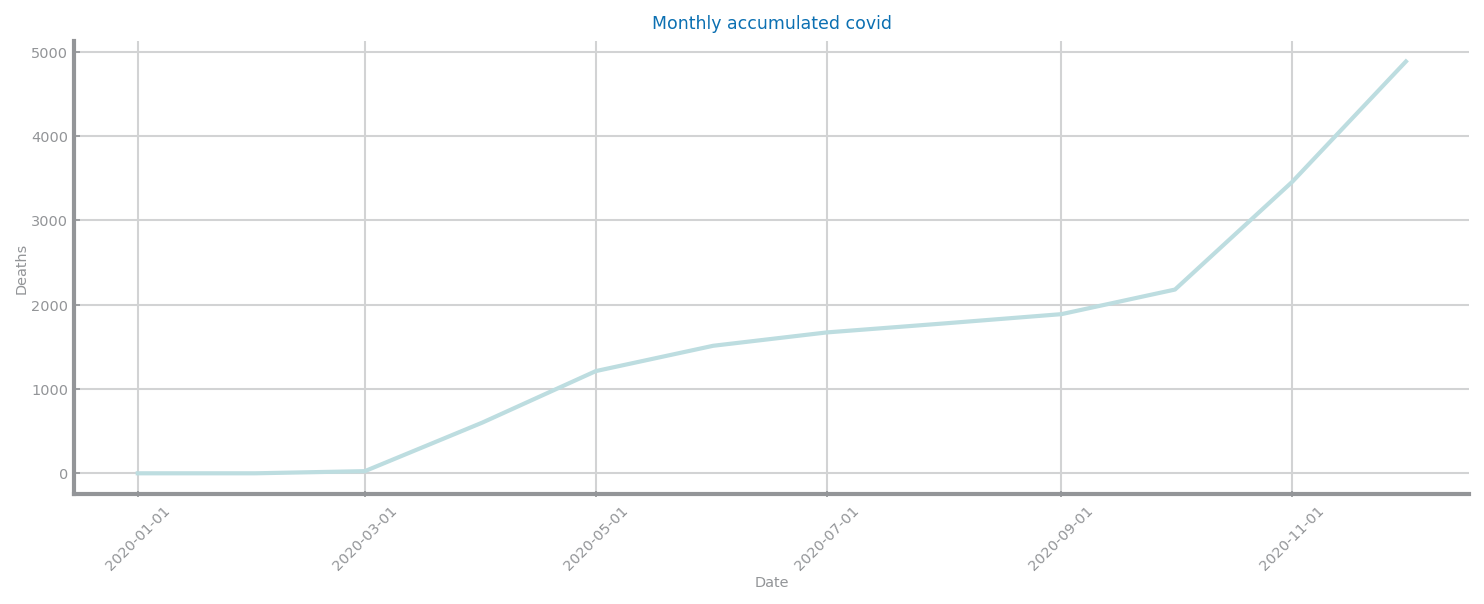

In [6]:
index = data_c.index.to_period('M')
c_month_df = data_c.copy().groupby(index).mean()
c_month_df['Date'] = index.drop_duplicates().to_timestamp()
c_month_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(c_month_df, title='Monthly accumulated covid', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

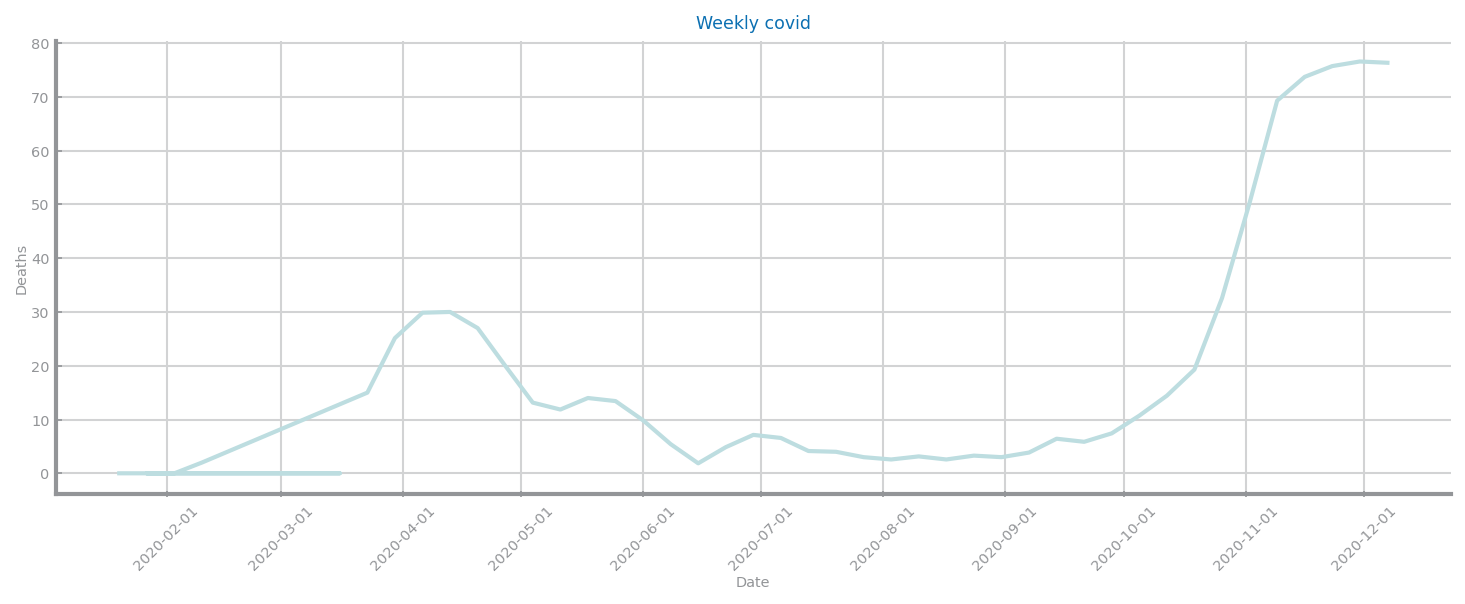

In [7]:
index = data_c2.index.to_period('W')
c2_week_df = data_c2.copy().groupby(index).mean()
c2_week_df['Date'] = index.drop_duplicates().to_timestamp()
c2_week_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(c2_week_df, title='Weekly covid', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

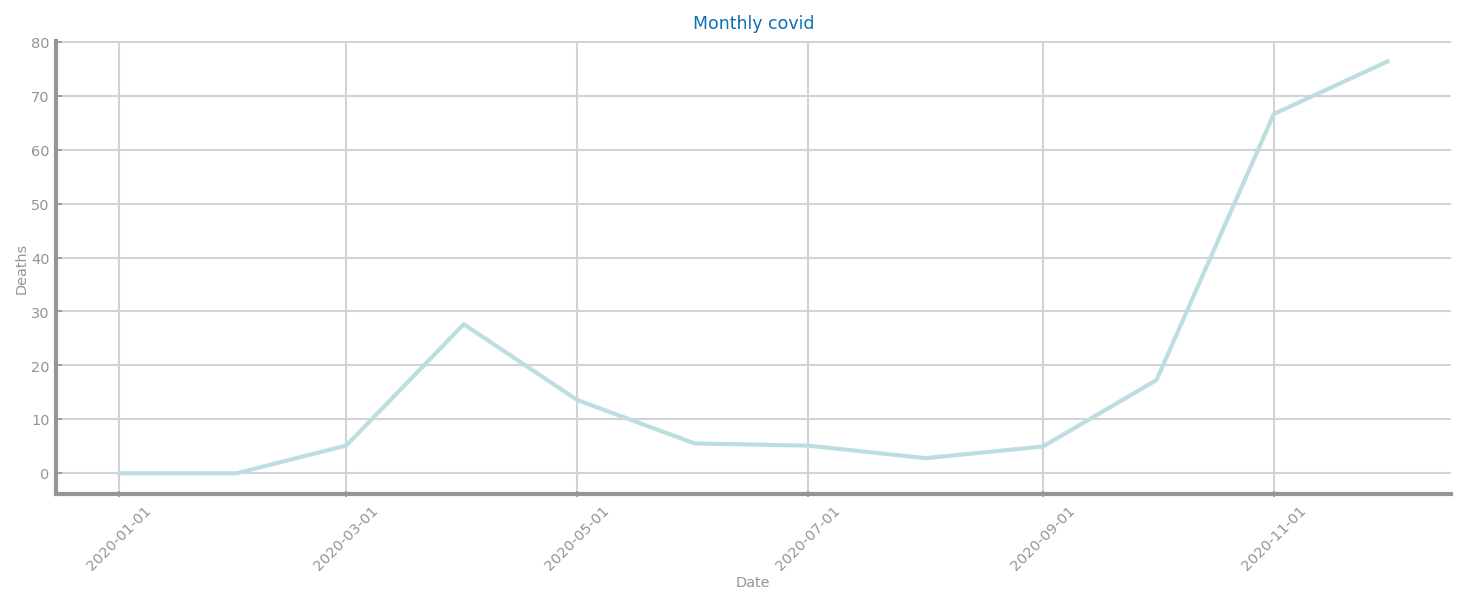

In [8]:
index = data_c2.index.to_period('M')
c2_month_df = data_c2.copy().groupby(index).mean()
c2_month_df['Date'] = index.drop_duplicates().to_timestamp()
c2_month_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(c2_month_df, title='Monthly covid', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

# Data Distribution
## Deaths
### 5-Number Summary

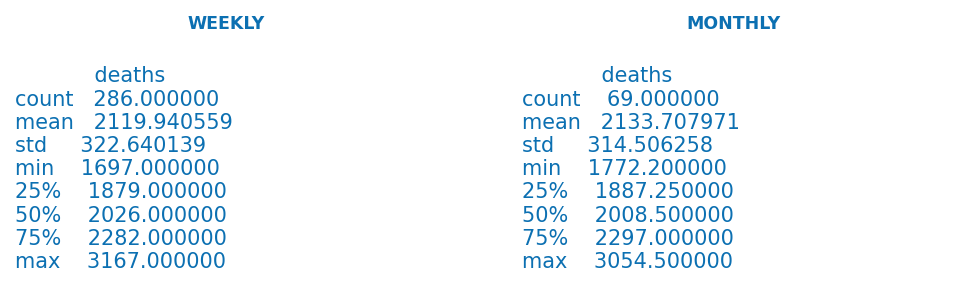

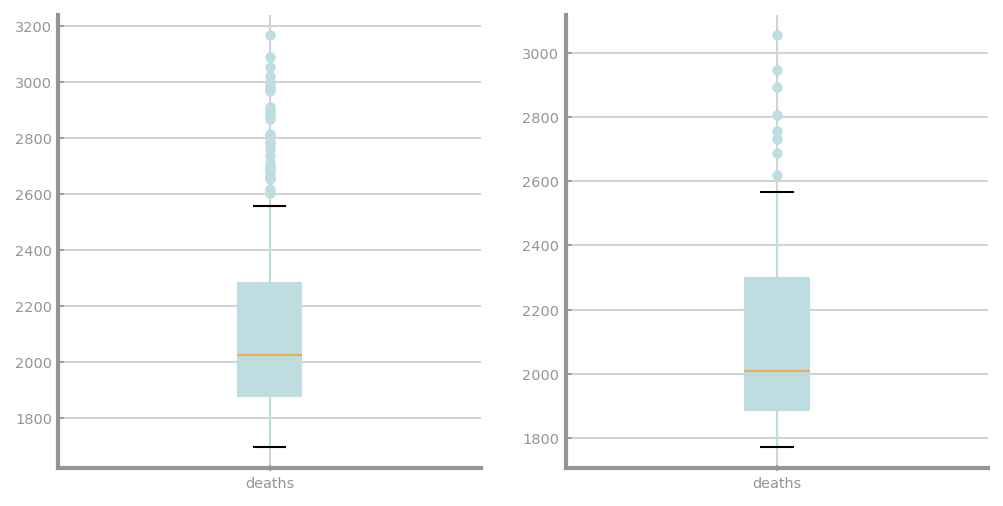

In [9]:
index = data_d.index.to_period('M')
d_month_df = data_d.copy().groupby(index).mean()
d_month_df['start_date'] = index.drop_duplicates().to_timestamp()
d_month_df.set_index('start_date', drop=True, inplace=True)
_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('WEEKLY', fontweight="bold")
axs[0].text(0, 0, str(data_d.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('MONTHLY', fontweight="bold")
axs[1].text(0, 0, str(d_month_df.describe()))
plt.show()

_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT))
data_d.boxplot(ax=axs[0])
d_month_df.boxplot(ax=axs[1])
plt.show()

### Variables Distribution

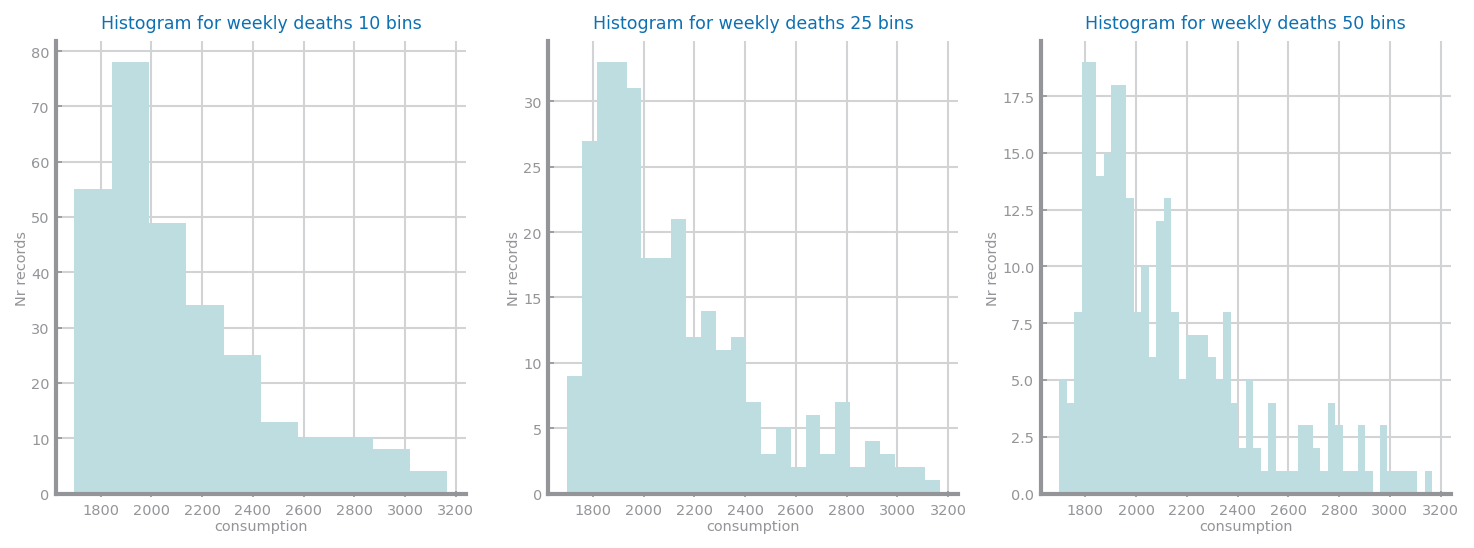

In [10]:
bins = (10, 25, 50)
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for weekly deaths %d bins'%bins[j])
    axs[j].set_xlabel('consumption')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data_d.values, bins=bins[j])
plt.show()

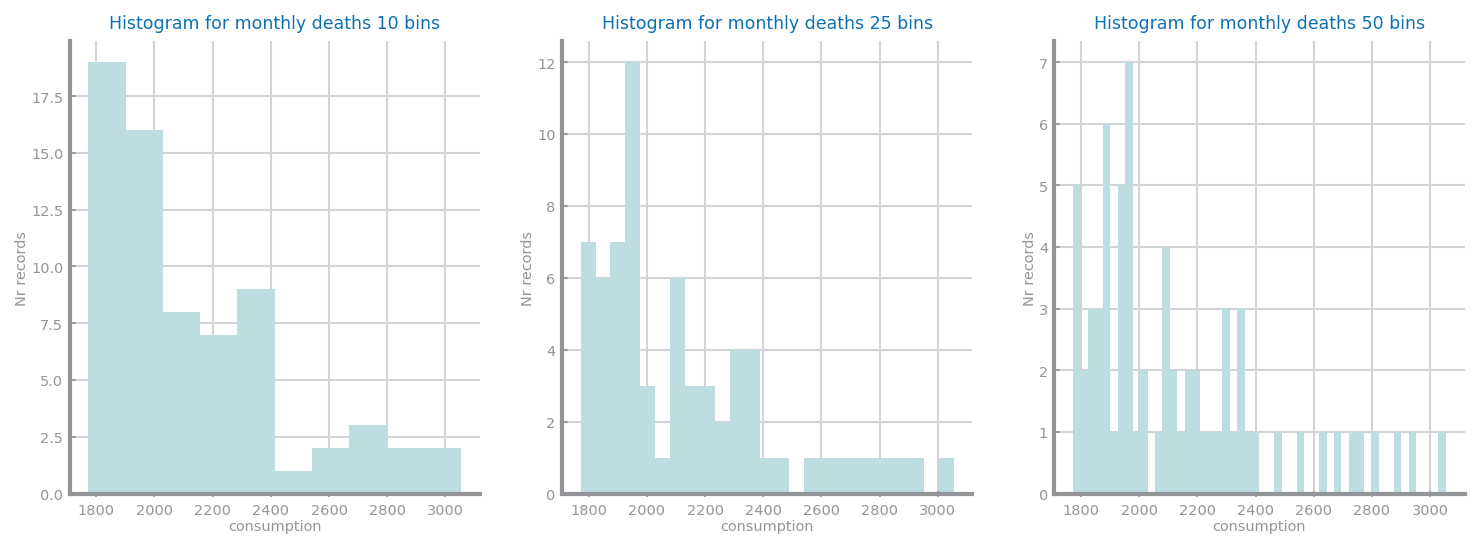

In [11]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for monthly deaths %d bins'%bins[j])
    axs[j].set_xlabel('consumption')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(d_month_df.values, bins=bins[j])
plt.show()

## Covid
### 5-Number Summary

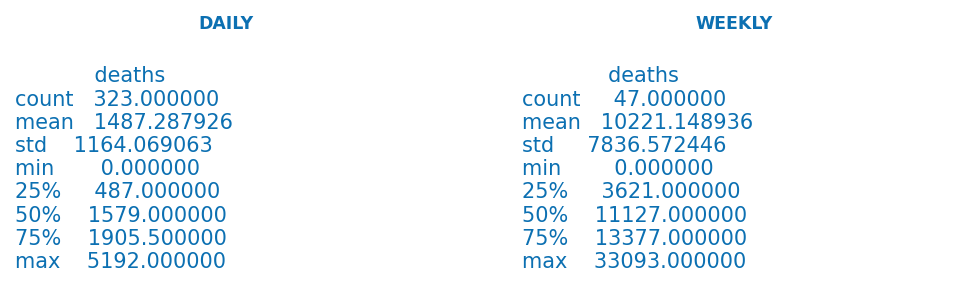

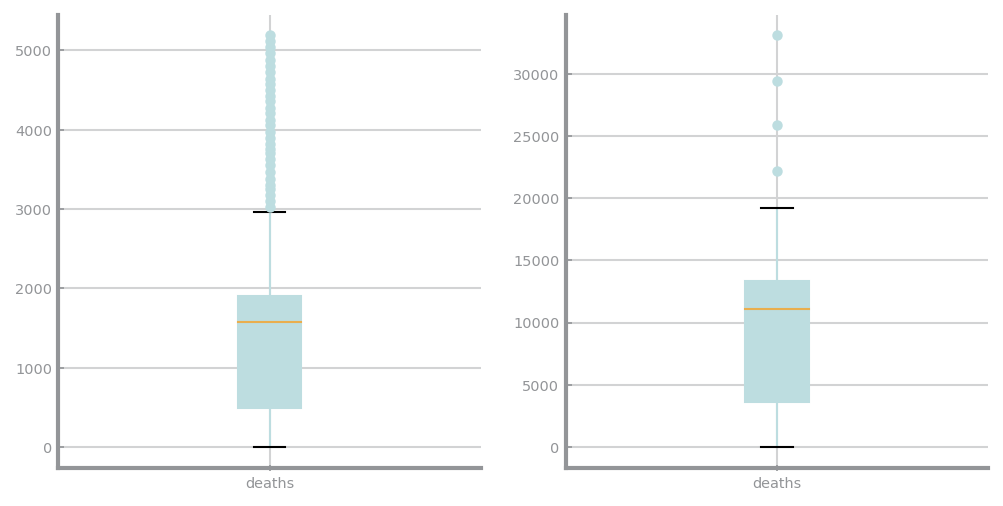

In [12]:
index = data_c.index.to_period('W')
c_week_df = data_c.copy().groupby(index).sum()
c_week_df['Date'] = index.drop_duplicates().to_timestamp()
c_week_df.set_index('Date', drop=True, inplace=True)
_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('DAILY', fontweight="bold")
axs[0].text(0, 0, str(data_c.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('WEEKLY', fontweight="bold")
axs[1].text(0, 0, str(c_week_df.describe()))
plt.show()

_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT))
data_c.boxplot(ax=axs[0])
c_week_df.boxplot(ax=axs[1])
plt.show()

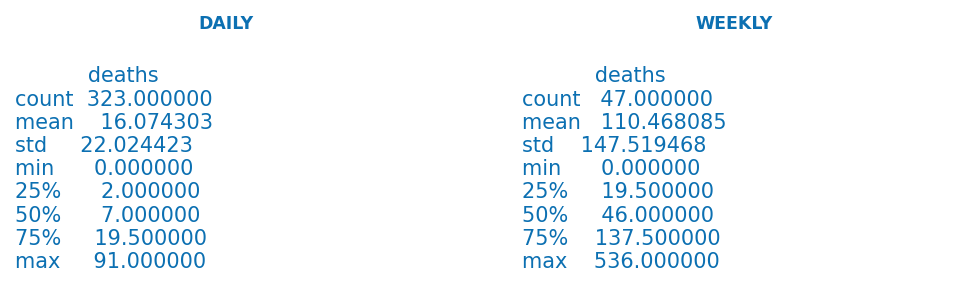

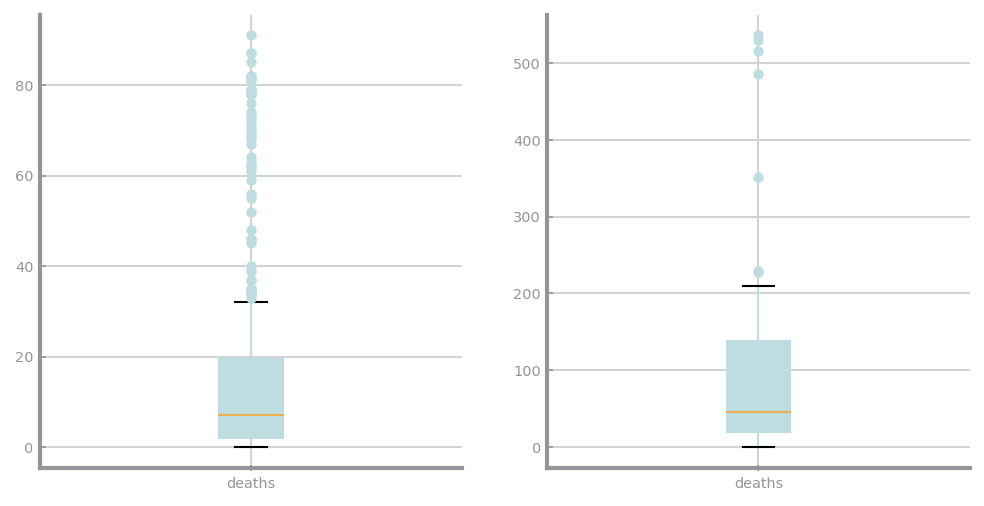

In [13]:
index = data_c2.index.to_period('W')
c2_week_df = data_c2.copy().groupby(index).sum()
c2_week_df['Date'] = index.drop_duplicates().to_timestamp()
c2_week_df.set_index('Date', drop=True, inplace=True)
_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('DAILY', fontweight="bold")
axs[0].text(0, 0, str(data_c2.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('WEEKLY', fontweight="bold")
axs[1].text(0, 0, str(c2_week_df.describe()))
plt.show()

_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT))
data_c2.boxplot(ax=axs[0])
c2_week_df.boxplot(ax=axs[1])
plt.show()

### Variables Distribution

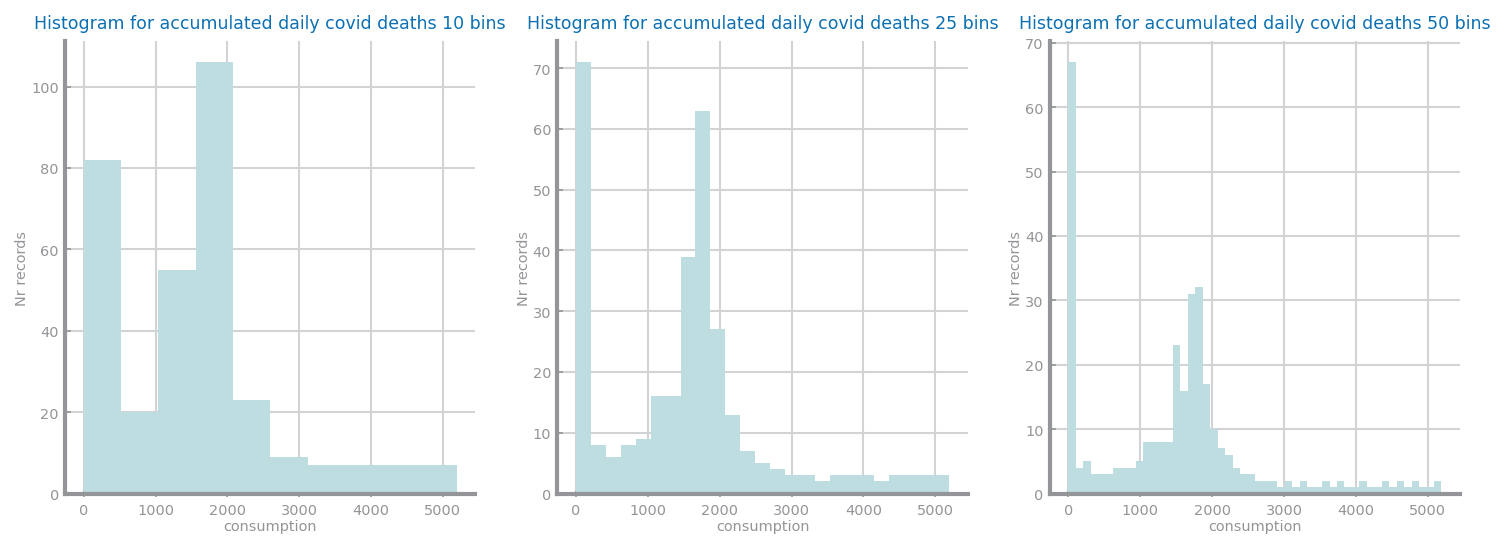

In [14]:
bins = (10, 25, 50)
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for accumulated daily covid deaths %d bins'%bins[j])
    axs[j].set_xlabel('consumption')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data_c.values, bins=bins[j])
plt.show()

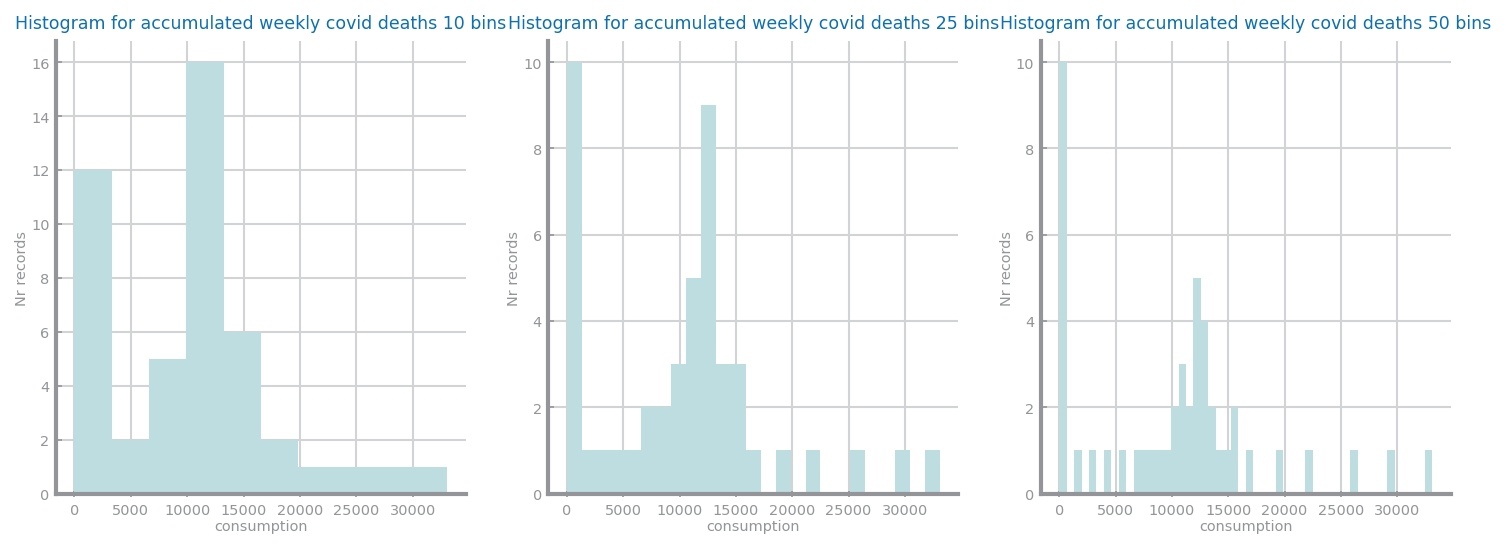

In [15]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for accumulated weekly covid deaths %d bins'%bins[j])
    axs[j].set_xlabel('consumption')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(c_week_df.values, bins=bins[j])
plt.show()

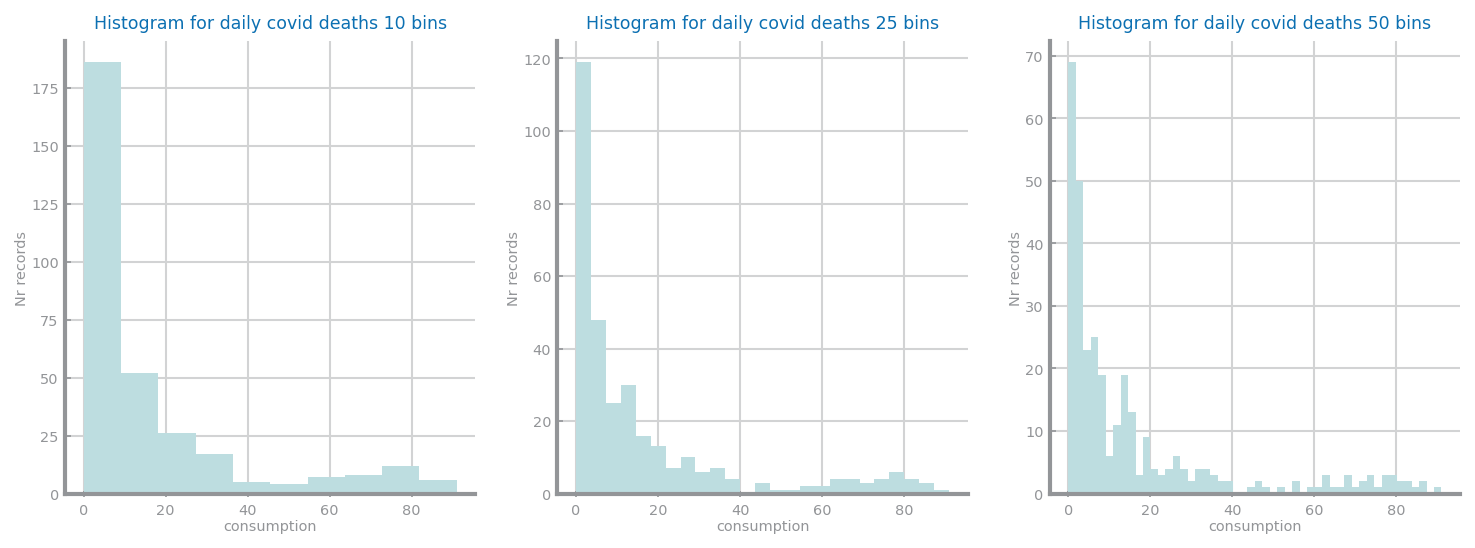

In [16]:
bins = (10, 25, 50)
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for daily covid deaths %d bins'%bins[j])
    axs[j].set_xlabel('consumption')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data_c2.values, bins=bins[j])
plt.show()

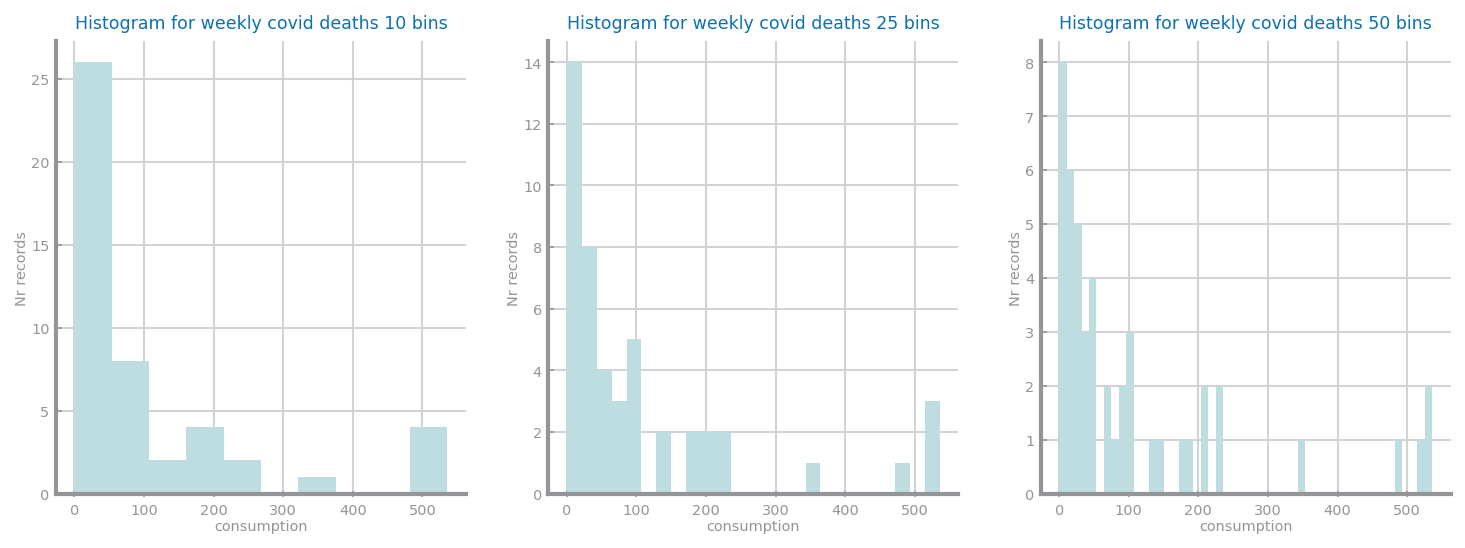

In [17]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for weekly covid deaths %d bins'%bins[j])
    axs[j].set_xlabel('consumption')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(c2_week_df.values, bins=bins[j])
plt.show()

# Data Stationarity
## Deaths

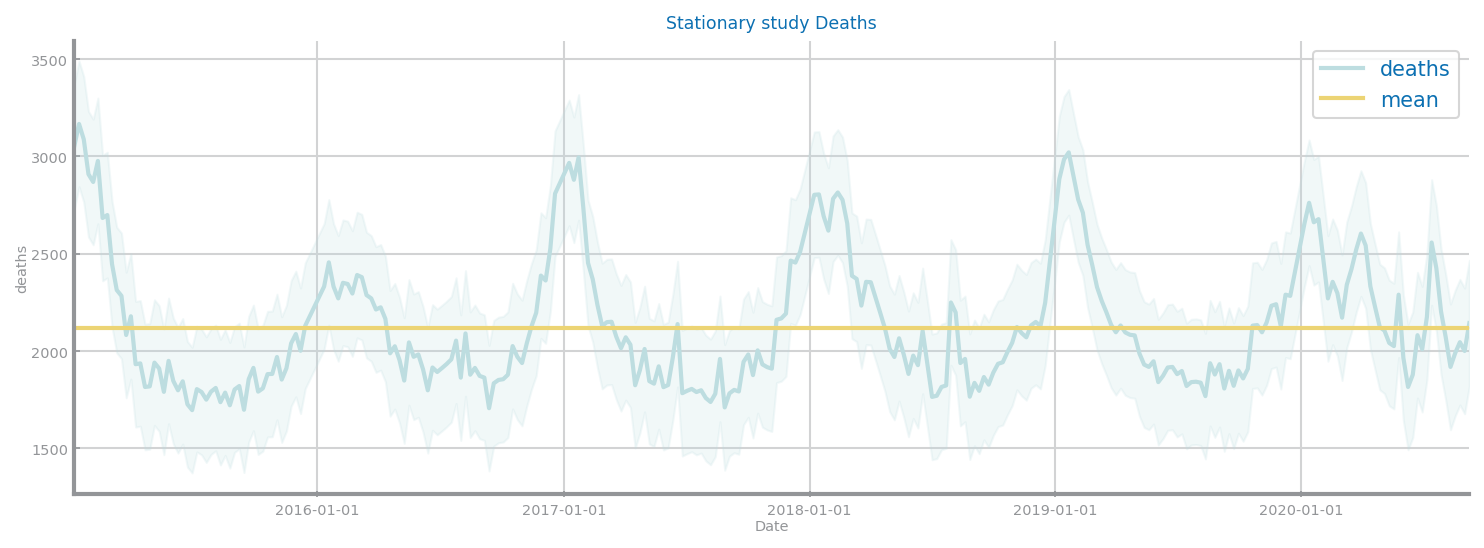

In [25]:
import numpy as np
dt_series = pd.Series(data_d['deaths'])

mean_line = pd.Series(np.ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='deaths', title='Stationary study Deaths', show_std=True)
plt.show()

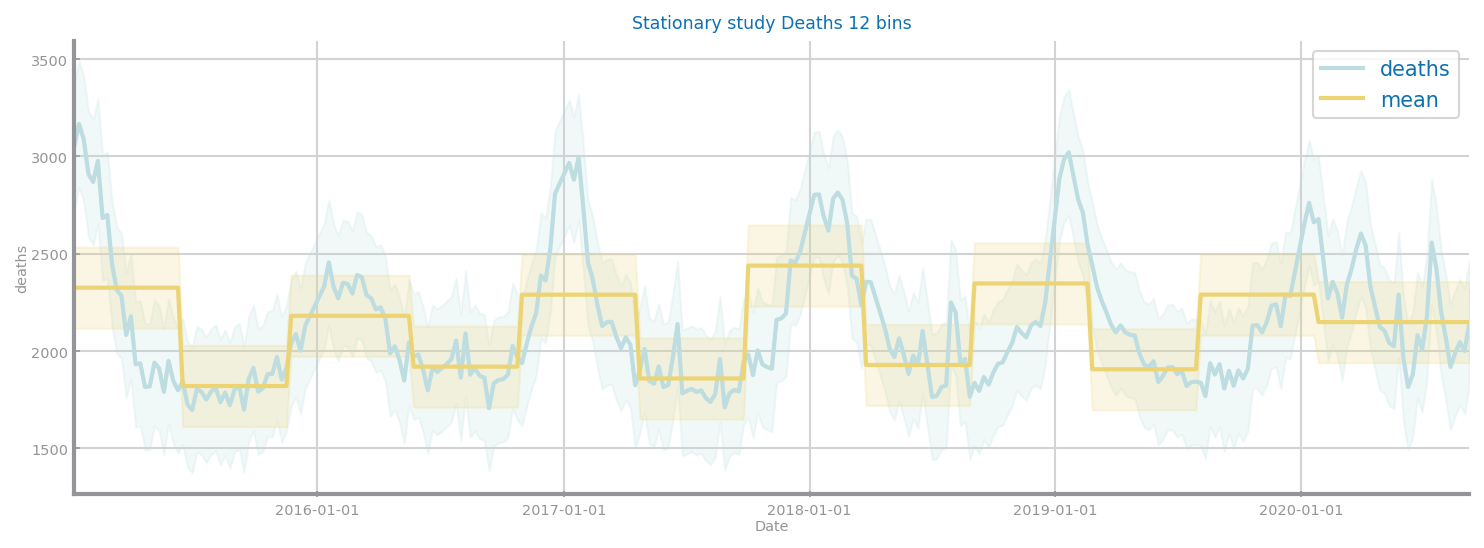

In [30]:
BINS = 12
line = []
n = len(dt_series)
for i in range(BINS):
    b = dt_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='deaths',
               title='Stationary study Deaths {} bins'.format(BINS), show_std=True)
plt.show()

## Covid

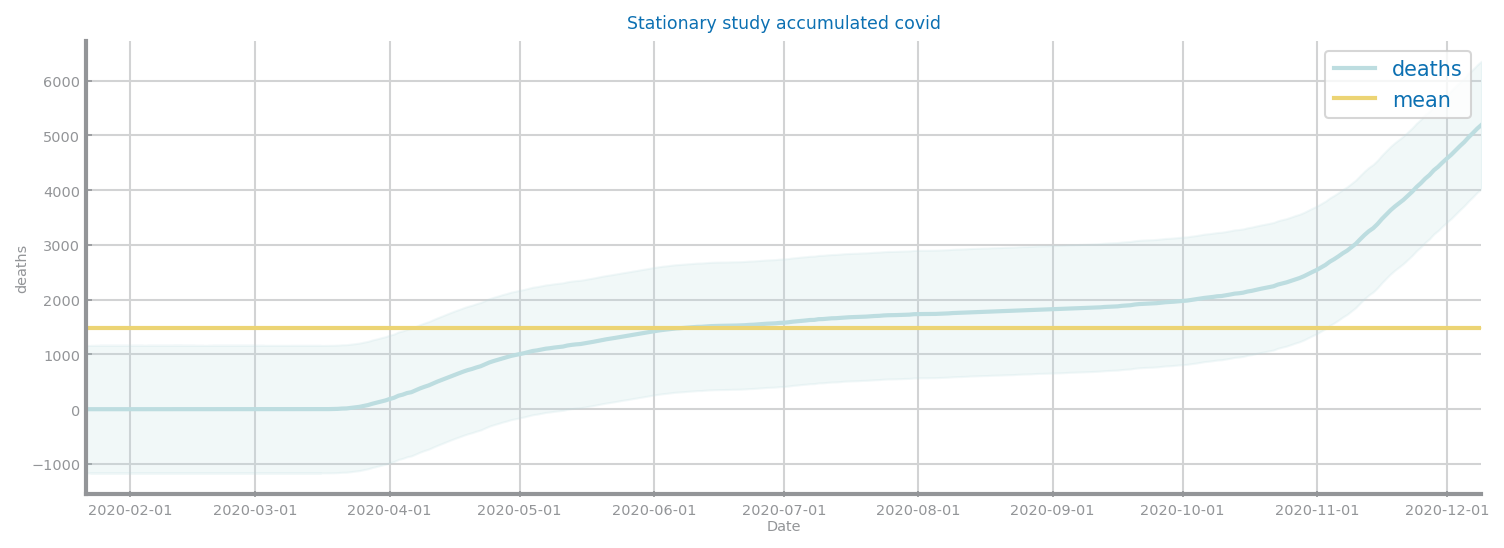

In [36]:
import numpy as np
dt_series = pd.Series(data_c['deaths'])

mean_line = pd.Series(np.ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='deaths', title='Stationary study accumulated covid', show_std=True)
plt.show()

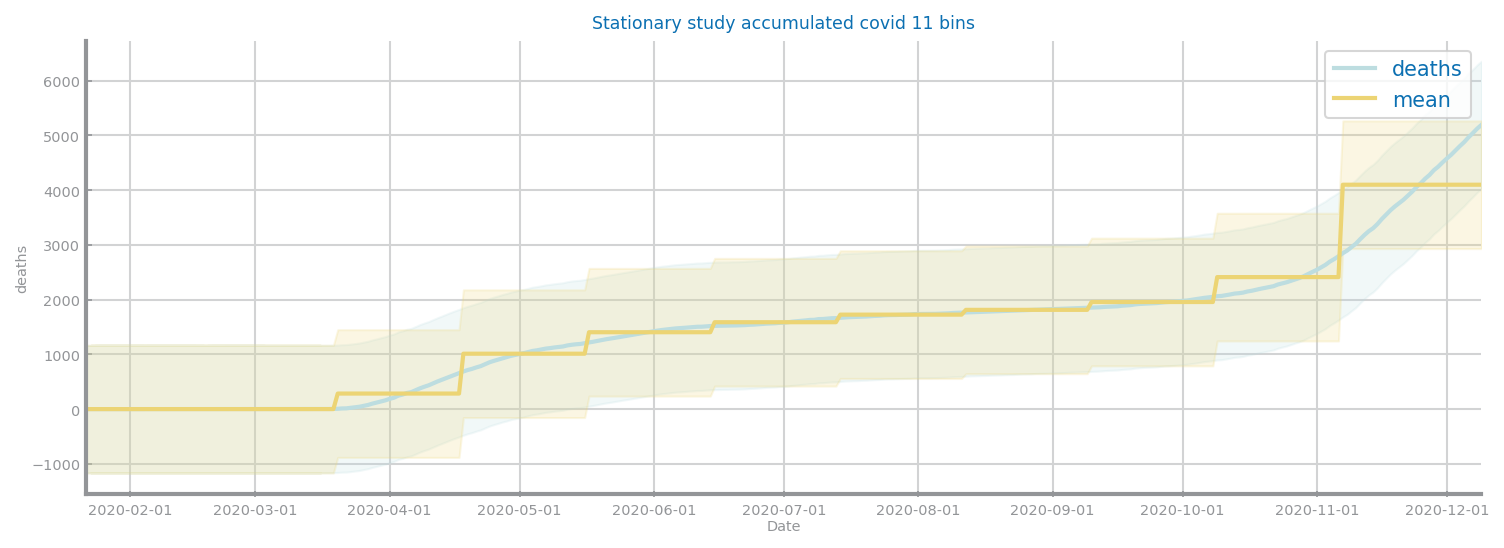

In [38]:
BINS = 11
line = []
n = len(dt_series)
for i in range(BINS):
    b = dt_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='deaths',
               title='Stationary study accumulated covid {} bins'.format(BINS), show_std=True)
plt.show()

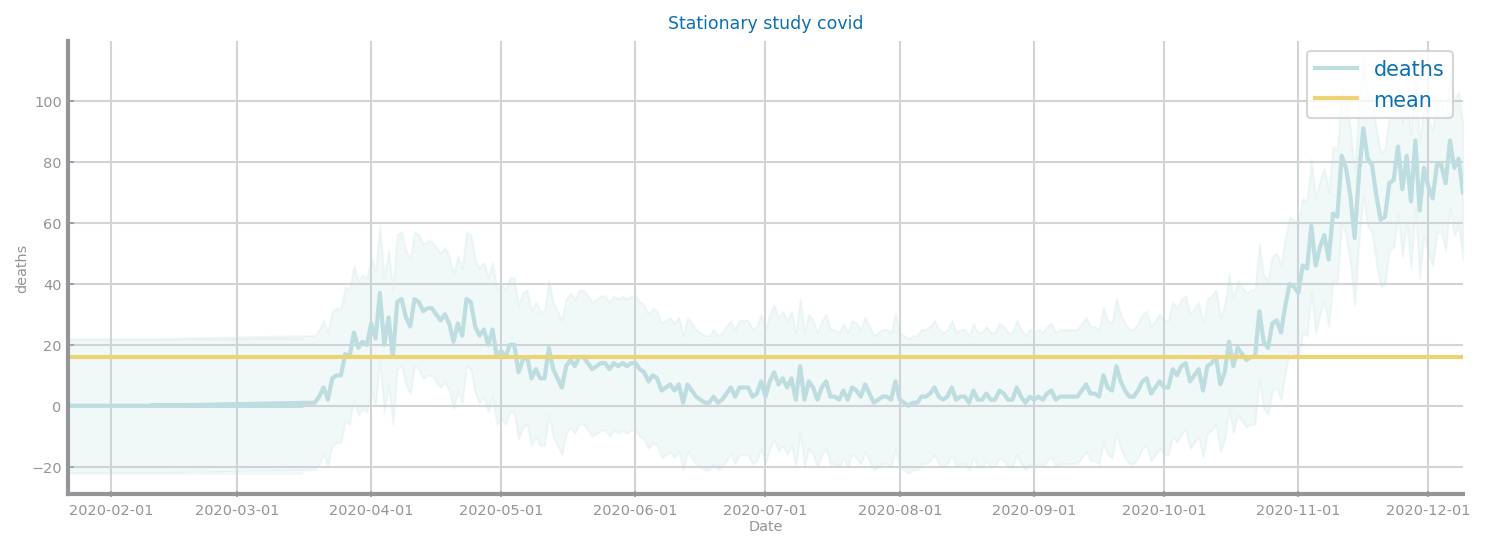

In [31]:
import numpy as np
dt_series = pd.Series(data_c2['deaths'])

mean_line = pd.Series(np.ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='deaths', title='Stationary study covid', show_std=True)
plt.show()

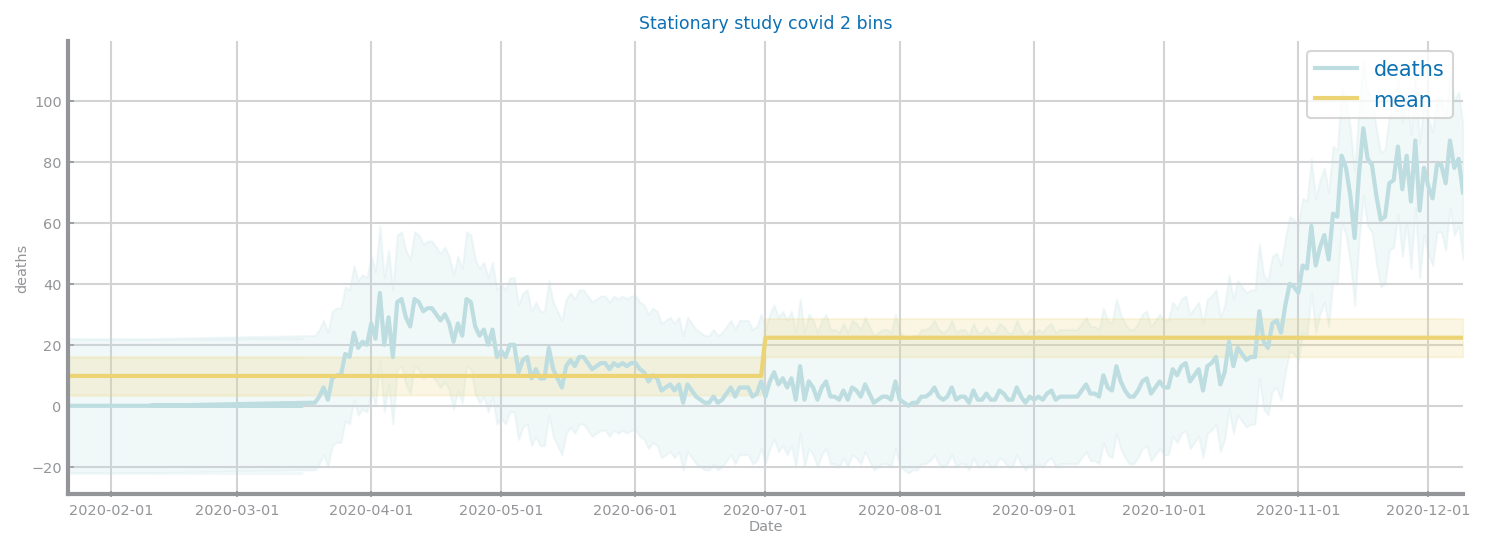

In [33]:
BINS = 2
line = []
n = len(dt_series)
for i in range(BINS):
    b = dt_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='deaths',
               title='Stationary study covid {} bins'.format(BINS), show_std=True)
plt.show()